In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from bin.morphology.transforms import edge_transform
from bin.adj_image_array import invert
from bin.utils.vector2d import Vector2D
from bin.morphology.utils import neighbour_array

In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

In [4]:
def first_neighbour(neighbourhood):
    if neighbourhood[2, 1]:
        return 1, 0
    if neighbourhood[2, 2]:
        return 1, 1
    if neighbourhood[1, 2]:
        return 0, 1
    return -1

In [5]:
def last_neighbour(neighbourhood):
    if neighbourhood[0, 2]:
        return -1, 1
    if neighbourhood[1, 2]:
        return 0, 1
    if neighbourhood[2, 2]:
        return 1, 1

In [6]:
def next_neighbour(point, visited, im):
    neighbours = list()
    neighbourhood = get_neighbourhood(point, im)
    [neighbours.append(point + n) for n in neighbour_array.side_neighbour_coordinates(neighbourhood)]
    [neighbours.append(point + n) for n in neighbour_array.diagonal_neighbour_coordinates(neighbourhood)]
    
    neighbours = [n for n in neighbours if n not in visited]
    
    return neighbours[0] if neighbours else None
    

In [7]:
def get_neighbourhood(point, im):
    if 0 < point.y < im.shape[0]-1 and 0 < point.x < im.shape[1]-1:
        return im[point.y-1:point.y+2, point.x-1:point.x+2]
    return -1

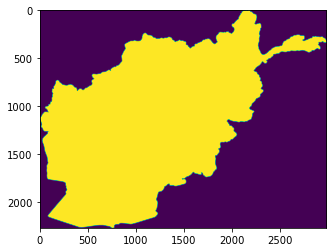

In [8]:
im = np.pad(invert(np.array(Image.open('lib/silhouettes/afghanistan-silhouette.bmp').convert('L'))), 1)
plt.imshow(im)

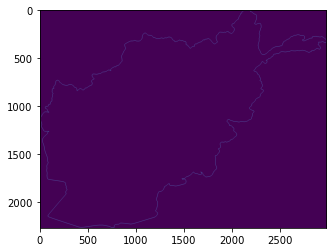

In [9]:
ime = edge_transform(im)
plt.imshow(ime)

In [10]:
p = np.where(ime == 1)
points = tuple(Vector2D(p[1][i], p[0][i]) for i in range(len(p[0])))
len(points)

10377

In [11]:
start = points[0]
start

Vector2D(x=2164, y=1)

In [12]:
neighbourhood = get_neighbourhood(start, ime)
next_ = start + first_neighbour(neighbourhood)
end_ = start + last_neighbour(neighbourhood)
next_, end_

(Vector2D(x=2164, y=2), Vector2D(x=2164, y=2))

In [13]:
visited = {start, end_}
loop = [start]
curr = next_

while curr:
    visited.add(curr)
    loop.append(curr)
    curr = next_neighbour(curr, visited, ime)
    
loop.append(end_)

KeyboardInterrupt: 

In [ ]:
loop_mat = np.zeros(im.shape)
for i, p in enumerate(loop):
    loop_mat[p] = i + 1
    
plt.imshow(loop_mat)

In [ ]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.plot([p[0] for p in loop], [p[1] for p in loop], np.arange(len(loop)))

In [ ]:
def relative_neighbour_number(point, neighbour):
    relative_diff = neighbour - point
    
    if relative_diff == (0, -1):
        return 0
    if relative_diff == (1, -1):
        return 1
    if relative_diff == (1, 0):
        return 2
    if relative_diff == (1, 1):
        return 3
    if relative_diff == (0, 1):
        return 4
    if relative_diff == (-1, 1):
        return 5
    if relative_diff == (-1, 0):
        return 6
    if relative_diff == (-1, -1):
        return 7
    
    return -1

In [ ]:
loop[0], loop[1], relative_neighbour_number(loop[0], loop[1])

In [15]:
Vector2D(1,1) - (1,1)

Vector2D(x=0, y=0)